# CIFAR-10

### Import libraries

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers, regularizers
import seaborn as sns

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Sanity check



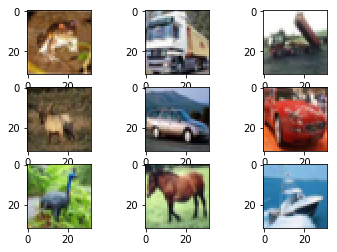

In [3]:
for i in range(3):
    for j in range(3):
        idx = i*3 + j + 1
        plt.subplot(3,3,idx)
        plt.imshow(X_train[idx-1])

### Basic Data Statistics

The images are pretty much equally distributed among all the classes, and the same goes for the test data set. This implies that the dataset does not have structural weaknesses, because there is not more of one class than another. 

Number of training examples:  50000
Number of testing examples:  10000
Shape of input images:  (32, 32, 3)
Data type:  uint8
Number of classes:  10


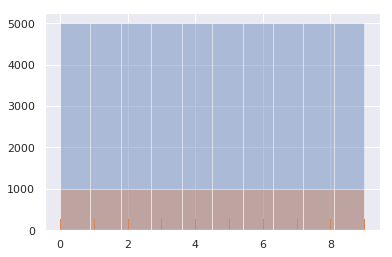

In [4]:
num_of_classes = np.unique(y_train).shape[0]
print("Number of training examples: ", X_train.shape[0])
print("Number of testing examples: ", X_test.shape[0])
print("Shape of input images: ", X_train.shape[1:])
print("Data type: ", X_train.dtype)
print("Number of classes: ", num_of_classes)
sns.set(color_codes=True)
sns.distplot(y_train, bins=10, kde=False, rug=True)
sns.distplot(y_test, bins=10, kde=False, rug=True)

### Pixel wise standardization

In [5]:
pixel_mean = X_train.mean(axis=0)
pixel_std = X_train.std(axis=0) + 1e-10 #prevents division by zero-error
# piwel-wise normalization on the train and test set
X_train = (X_train - pixel_mean) / pixel_std
X_test = (X_test - pixel_mean) / pixel_std


### To_categorical



In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Change data shape

In [7]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

### Split data

In [8]:
seed = 7
np.random.seed(seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (40000, 32, 32, 3)
Validation set shape:  (10000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


#### Perform some data augmentation
Gjør mer av dette etterpå kanskje

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


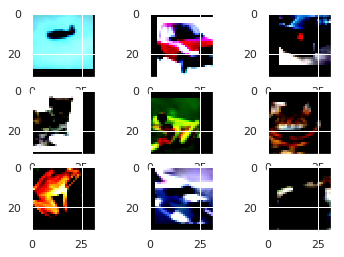

In [9]:
datagen = ImageDataGenerator(fill_mode='constant',
                             width_shift_range=0.2,
                            height_shift_range=0.2,
                             cval=0,
                            )

datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32,3))
    plt.show()
    break

## Build Model

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

#### Compile model

In [11]:
adam = keras.optimizers.Adam(lr=0.00030, epsilon=1e-8)

model.compile(optimizer=adam,
             loss="categorical_crossentropy",
             metrics=['accuracy'],
             )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

#### Train the model on images with slight augmentation

In [12]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=64),
                   steps_per_epoch=len(X_train)/64,
                   epochs=30,
                   validation_data=(X_val, y_val),
                   verbose=1)


Epoch 1/30
625/625 [==============================] - 58s 93ms/step - loss: 1.9863 - acc: 0.2552 - val_loss: 1.6300 - val_acc: 0.4111
Epoch 2/30
625/625 [==============================] - 56s 90ms/step - loss: 1.7122 - acc: 0.3618 - val_loss: 1.4781 - val_acc: 0.4538
Epoch 3/30
625/625 [==============================] - 55s 88ms/step - loss: 1.5740 - acc: 0.4211 - val_loss: 1.3502 - val_acc: 0.5147
Epoch 4/30
625/625 [==============================] - 54s 87ms/step - loss: 1.4869 - acc: 0.4598 - val_loss: 1.2699 - val_acc: 0.5419
Epoch 5/30
625/625 [==============================] - 60s 95ms/step - loss: 1.4201 - acc: 0.4893 - val_loss: 1.1933 - val_acc: 0.5759
Epoch 6/30
625/625 [==============================] - 60s 95ms/step - loss: 1.3669 - acc: 0.5132 - val_loss: 1.1787 - val_acc: 0.5793
Epoch 7/30
625/625 [==============================] - 63s 101ms/step - loss: 1.3109 - acc: 0.5319 - val_loss: 1.1291 - val_acc: 0.6002
Epoch 8/30
625/625 [==============================] - 58s 93m

### Visualize and analyse

fit_generator tracks both loss and accuracy on training and validation set

#### Loss

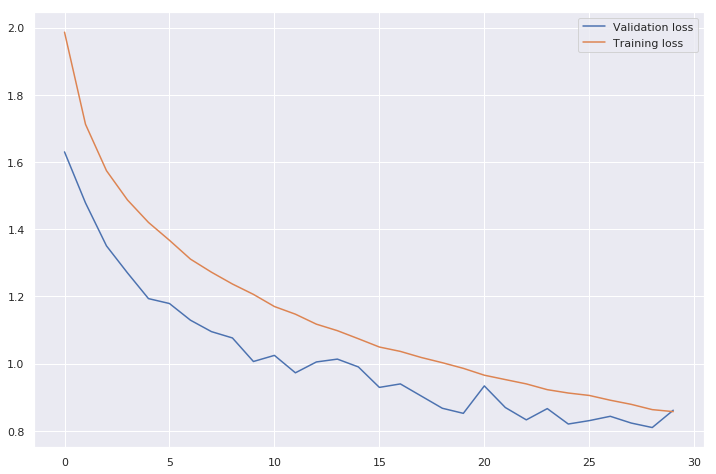

In [13]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.legend()

#### Accuracy

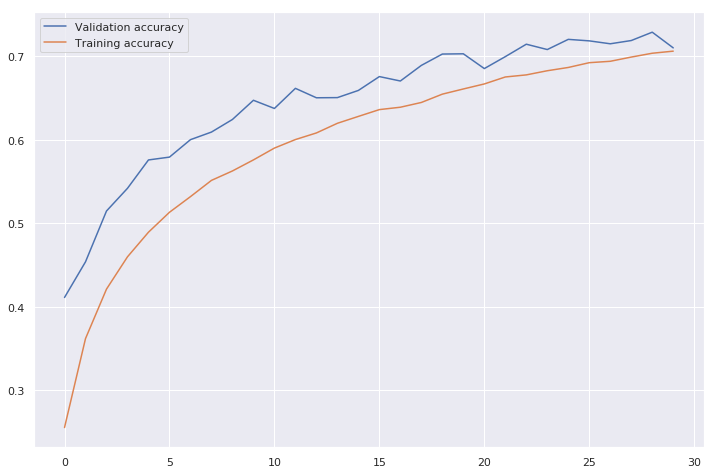

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(history["val_acc"], label="Validation accuracy")
plt.plot(history["acc"], label="Training accuracy")

plt.legend()

### Evaluation on test set

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print("Test acc: ", test_acc)

10000/10000 [==============================] - 4s 409us/step
Test loss:  0.8565536771774293
Test acc:  0.7148


#### Compare to previous plot

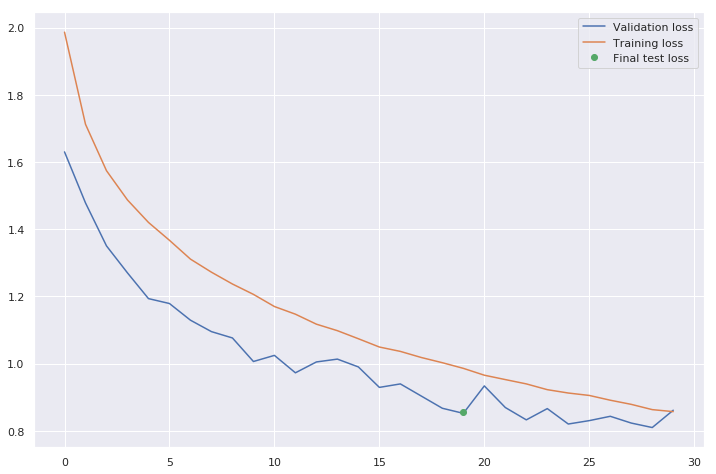

In [16]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")
plt.plot([19], [test_loss], 'o', label="Final test loss")
plt.legend()

### Classification report

In [19]:
from sklearn.metrics import classification_report
predicted = model.predict(X_test)
target_names = ["airplane","automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
report = classification_report(y_test.argmax(axis=1), predicted.argmax(axis=1), target_names=target_names)
print(report)


             precision    recall  f1-score   support

   airplane       0.71      0.83      0.76      1000
 automobile       0.90      0.81      0.86      1000
       bird       0.71      0.51      0.59      1000
        cat       0.70      0.40      0.51      1000
       deer       0.71      0.65      0.68      1000
        dog       0.75      0.53      0.62      1000
       frog       0.56      0.93      0.70      1000
      horse       0.77      0.75      0.76      1000
       ship       0.85      0.82      0.83      1000
      truck       0.64      0.91      0.75      1000

avg / total       0.73      0.71      0.71     10000

